<a href="https://colab.research.google.com/github/ukasz21/learning/blob/main/ml_tutorials/ml_fromscratch/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

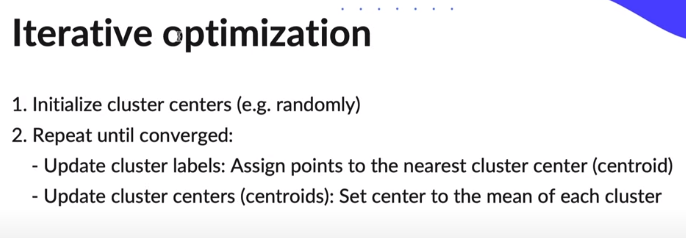

how it works

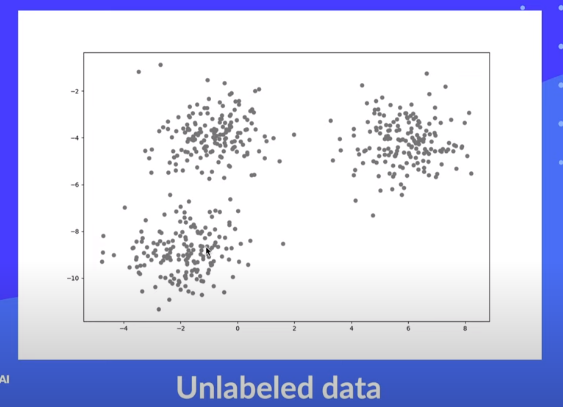

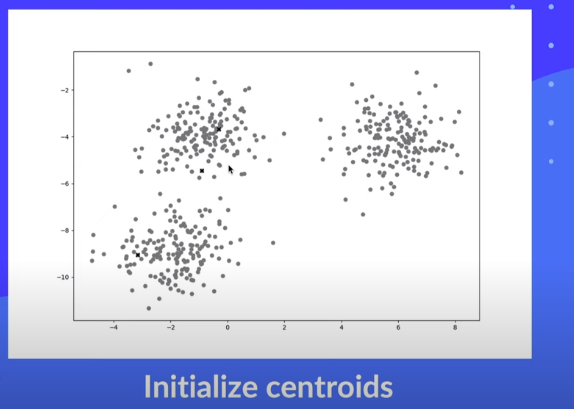

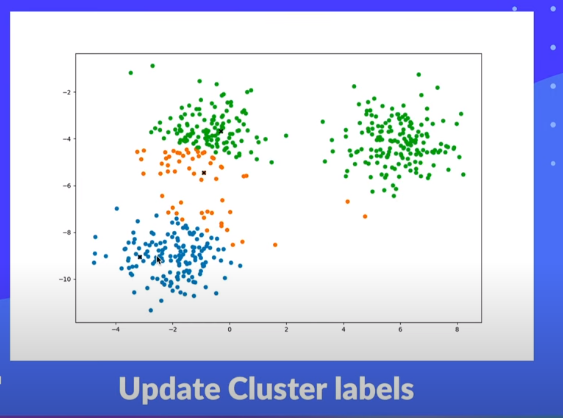

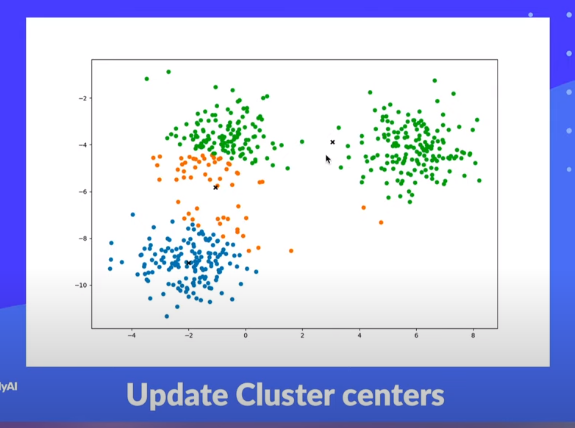

and we repeat this until there is no changes

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)**2))

In [16]:
class KMeans:
  def __init__(self, k=5, max_iters=600, plot_steps=False):
    self.k = k
    self.max_iters = max_iters
    self.plot_steps = plot_steps

    #list of sample indices for each cluster
    self.clusters = [[] for _ in range(self.k)]

    #the centers (mean vector) for each cluster
    self.centroids = []

  def predict(self, X):
    self.X = X
    self.n_samples, self.n_features = X.shape

    #initialize the centroids
    random_sample_ind = np.random.choice(self.n_samples, self.k, replace=False)
    self.centroids = [self.X[idx] for idx in random_sample_ind]

    if self.plot_steps:
      self.plot()

    #optimize clusters
    for _ in range(self.max_iters):
      # assign samples to closest centroids(create clusters)
      self.clusters = self._create_clusters(self.centroids)

      #calculate new centroids from clusters
      centroids_old = self.centroids
      self.centroids = self._get_centroids(self.clusters)

      if self._is_converged(centroids_old, self.centroids):
        break

      if self.plot_steps:
        self.plot()
  # classify samples as the index of their clusters
    return self._get_cluster_labels(self.clusters)


  def _get_cluster_labels(self, clusters):
    # each sample will get the label of the cluster it was assigned to
    labels = np.empty(self.n_samples)
    for cluster_idx, cluster in enumerate(clusters):
      for sample_idx in cluster:
        labels[sample_idx] = cluster_idx

    return labels

  def _create_clusters(self, centroids):
    #assign the samples to the closest centroid

    clusters = [[] for _ in range(self.k)]
    for idx, sample in enumerate(self.X):
      centroid_idx = self._closest_centroid(sample, centroids)
      clusters[centroid_idx].append(idx)
    return clusters

  def _closest_centroid(self, sample, centroids):
    #determine the distance of the current sample to each centroid

    distances = [euclidean_distance(sample, point) for point in centroids]
    closest_idx = np.argmin(distances)
    return closest_idx

  def _get_centroids(self, clusters):
    #assign the min value of clusters to centroids

    centroids = np.zeros((self.k, self.n_features))
    for cluster_idx, cluster in enumerate(clusters):
      cluster_mean = np.mean(self.X[cluster], axis=0)
      centroids[cluster_idx] = cluster_mean
    return centroids

  def _is_converged(self, centroids_old, centroids):
    # check distances between old and new centroid for all centroids
    distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
    return sum(distances) == 0

  def plot(self):
    fig, ax = plt.subplots(figsize=(12,8))

    for i, index in enumerate(self.clusters):
      point = self.X[index].T
      ax.scatter(*point)

    for point in self.centroids:
      ax.scatter(*point, marker='x', color='black', linewidth=2)

    plt.show()

(500, 2)
3


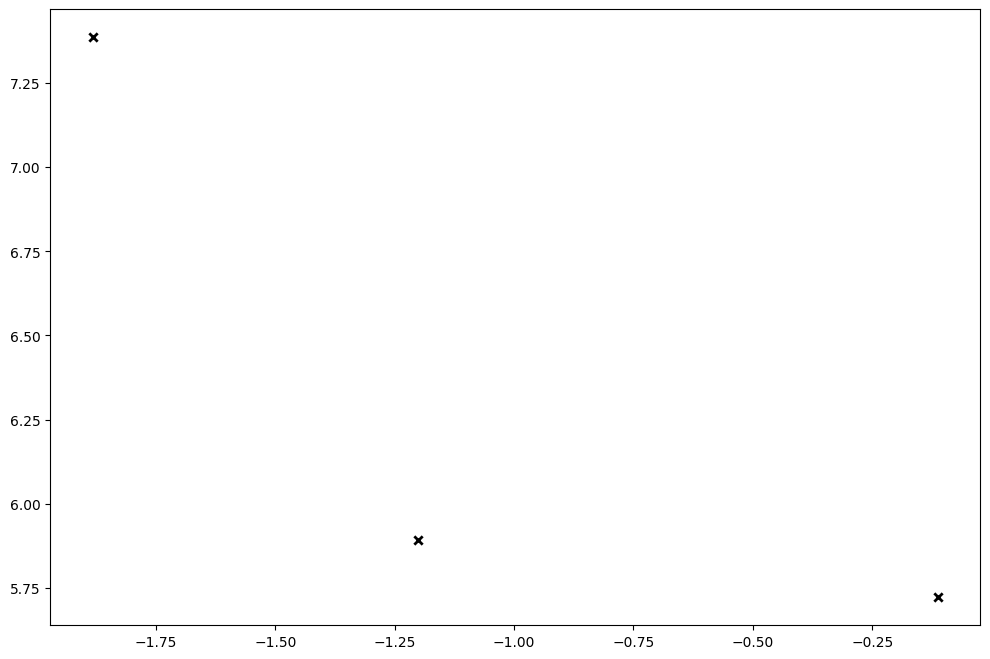

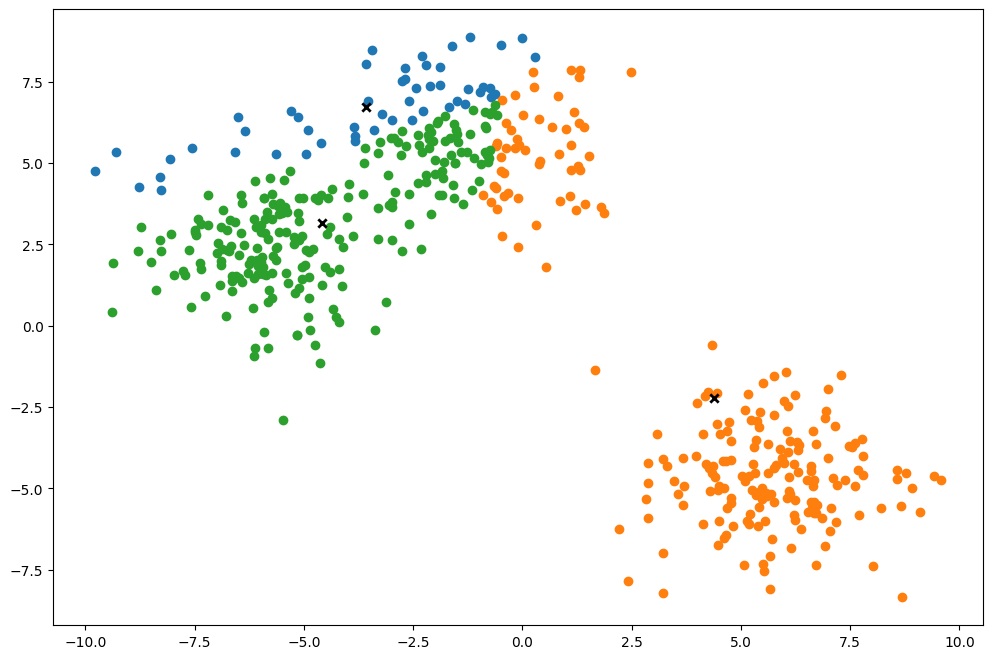

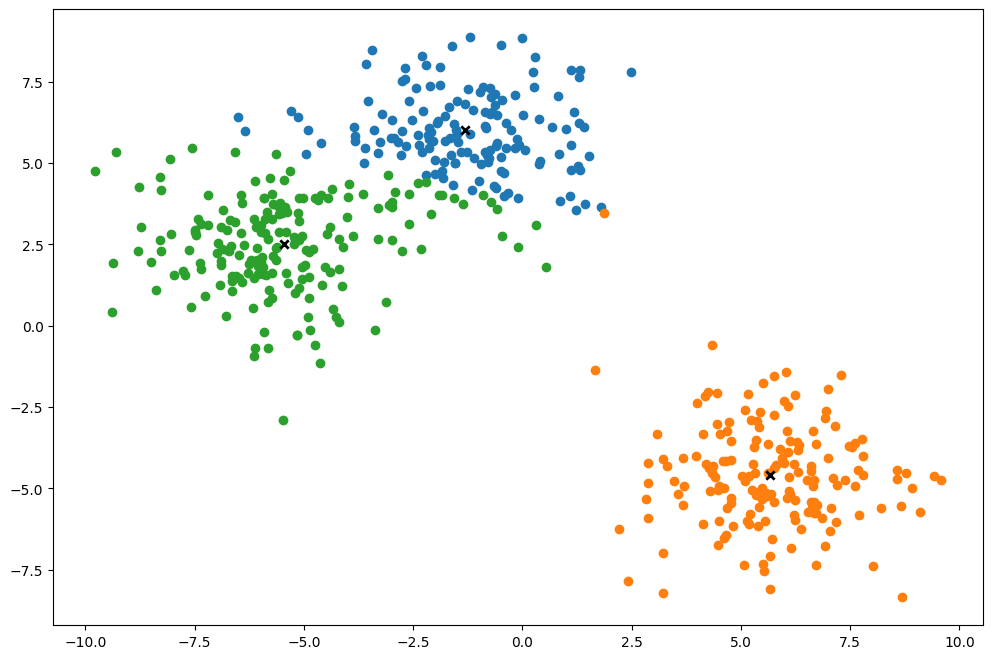

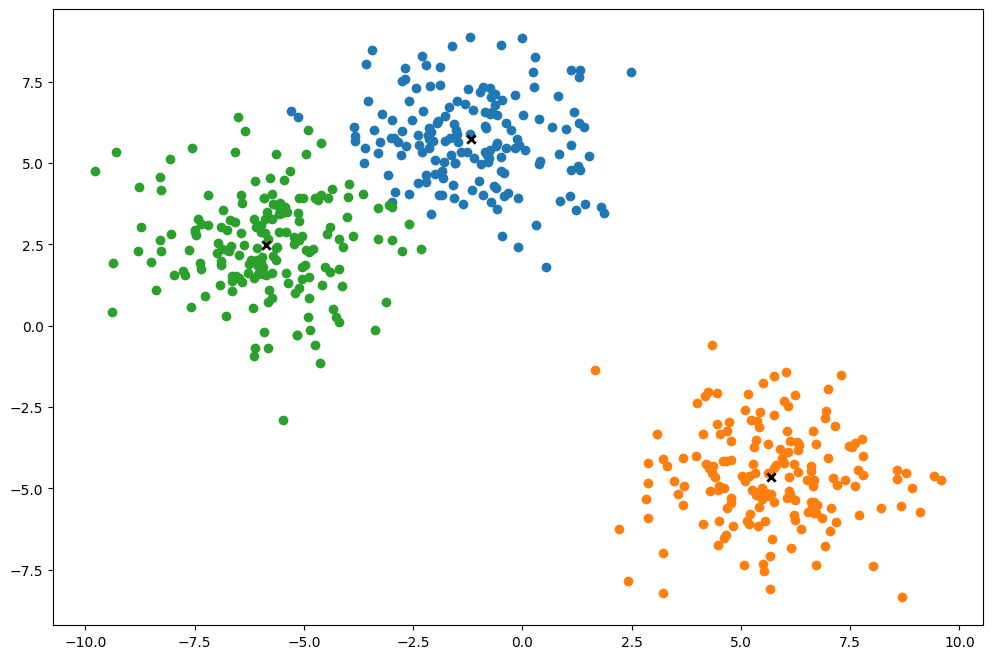

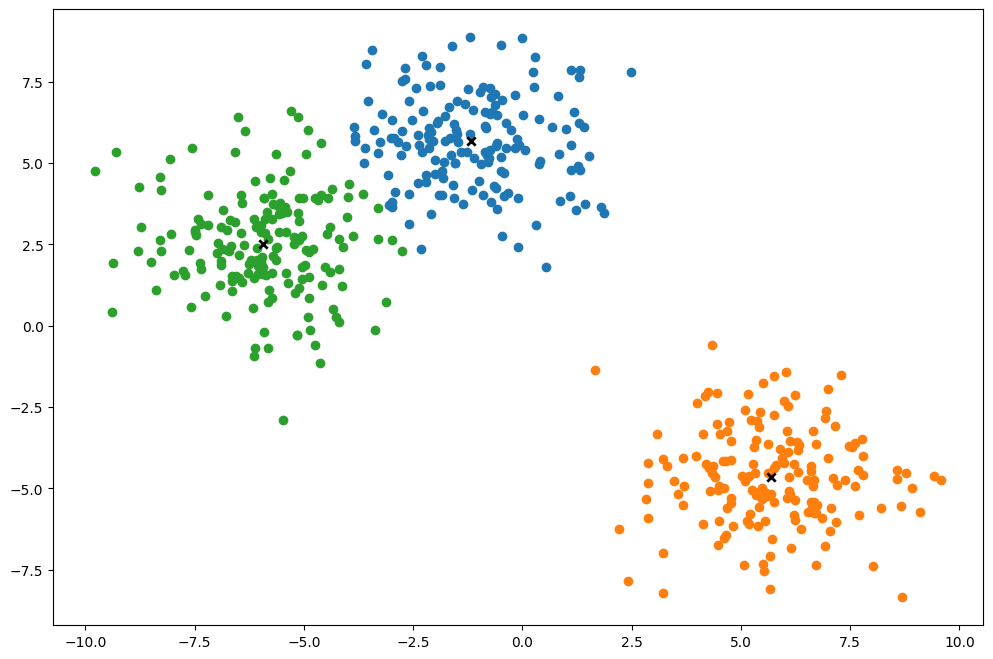

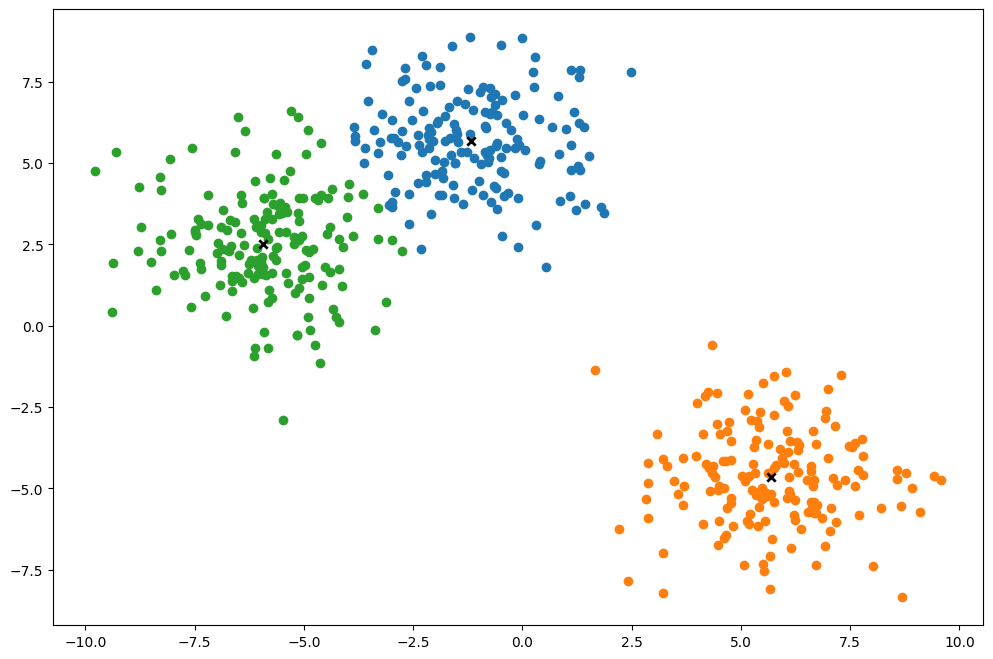

In [30]:
from sklearn.datasets import make_blobs

np.random.seed(333)
X, y = make_blobs(centers=3, n_samples=500, n_features=2, cluster_std = 1.5, shuffle=True, random_state=1234)

print(X.shape)
clusters = len(np.unique(y))
print(clusters)

k = KMeans(k=clusters, max_iters=500, plot_steps=True)
y_pred = k.predict(X)

k.plot()